In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import walk

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, SGD

import custom_loss_functions as c_loss

Using TensorFlow backend.


In [2]:
def simple_model():
    """Define simple model"""
    # create model
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(96,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='linear'))
    # show info
    model.summary()
    # compile model
    model.compile(loss = c_loss.mse_wrap_angle,
                  optimizer = 'adam',
                  metrics = [c_loss.mae_wrap_angle])
    return model

## Training

In [3]:
# define training parameters
batch_size = 1
num_epochs = 10

In [4]:
# define dataset directory
data_dir = '/media/feliximmohr/Storage/master_thesis/generated/database/' 
# load filelist
filelist = []
for (dirpath, dirnames, filenames) in walk(data_dir):
    filelist.extend(filenames)
    
# load column labels only
column_label = pd.read_csv(data_dir+filelist[1], nrows=1).columns.tolist()
feature_label = [s for s in column_label if ("ILD"  in s or "ITD" in s or "IC" in s)]
target_label = 'Localization_Azimuth'

In [5]:
# normalization + train_test_split

# load data
data = pd.read_csv(data_dir+filelist[60])
#test_data = pd.read_csv(data_dir+filelist[61])

# define scaler
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
minmax_scaler.partial_fit(data[feature_label])
#minmax_scaler.partial_fit(test_data[feature_label])

std_scale = preprocessing.StandardScaler().fit(data[feature_label])

# perform train_test_split
train, test = train_test_split(data, test_size=0.2)

# perform scaling
train_minmax = minmax_scaler.transform(train[feature_label])
test_minmax = minmax_scaler.transform(test[feature_label])
train_std = std_scale.transform(train[feature_label])
test_std = std_scale.transform(test[feature_label])

x_train = train_minmax
y_train = train[target_label]
x_test = test_minmax
y_test = test[target_label]

In [6]:
# model.fit on entire dataset

model = simple_model()

history = model.fit(x_train, y_train,
                    #batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=0.3)

W0902 19:35:21.135074 140504774072128 deprecation_wrapper.py:119] From /home/feliximmohr/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0902 19:35:21.156518 140504774072128 deprecation_wrapper.py:119] From /home/feliximmohr/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0902 19:35:21.161090 140504774072128 deprecation_wrapper.py:119] From /home/feliximmohr/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0902 19:35:21.211896 140504774072128 deprecation_wrapper.py:119] From /home/feliximmohr/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimize

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               12416     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 29,057
Trainable params: 29,057
Non-trainable params: 0
_________________________________________________________________


W0902 19:35:21.420001 140504774072128 deprecation_wrapper.py:119] From /home/feliximmohr/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0902 19:35:21.607722 140504774072128 deprecation_wrapper.py:119] From /home/feliximmohr/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 403200 samples, validate on 172800 samples
Epoch 1/10
403200/403200 [==============================] - 34s 85us/step - loss: 472.7009 - mae_wrap_angle: 11.1844 - val_loss: 162.7915 - val_mae_wrap_angle: 7.5278
Epoch 2/10
403200/403200 [==============================] - 34s 85us/step - loss: 174.2412 - mae_wrap_angle: 7.4142 - val_loss: 318.0879 - val_mae_wrap_angle: 12.1893
Epoch 3/10
403200/403200 [==============================] - 34s 85us/step - loss: 160.0712 - mae_wrap_angle: 7.0573 - val_loss: 163.3533 - val_mae_wrap_angle: 6.9435
Epoch 4/10
403200/403200 [==============================] - 34s 84us/step - loss: 130.4777 - mae_wrap_angle: 6.5762 - val_loss: 185.9475 - val_mae_wrap_angle: 9.2253
Epoch 5/10
403200/403200 [==============================] - 34s 84us/step - loss: 127.3530 - mae_wrap_angle: 6.5256 - val_loss: 94.1252 - val_mae_wrap_angle: 5.6709
Epoch 6/10
403200/403200 [==============================] - 35s 87us/step - loss: 104.6751 - mae_wrap_angle: 6.0543 -

## Evaluation

Test loss: 73.26709940338135
Test mae w wrap: 5.641507115364075


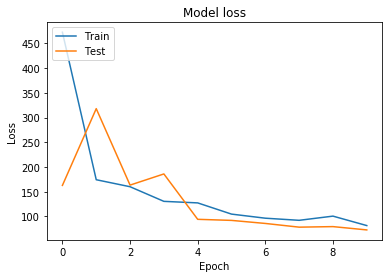

In [7]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test mae w wrap:', score[1])


# plot train history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#test_data = pd.read_csv(data_dir+filelist[68])
test_features = test_data[feature_label].values
test_features_minmax = minmax_scaler.transform(test_features)
test_targets = test_data[target_label].values


test_results = model.predict(test_features_minmax)

In [8]:
test_results = model.predict(test_minmax)

In [12]:
test_results[0:100]

array([[-145.43668  ],
       [-162.66833  ],
       [-193.725    ],
       [-129.70116  ],
       [  -2.5113537],
       [  82.73407  ],
       [ -34.898727 ],
       [  98.94652  ],
       [ -31.810322 ],
       [ 125.075195 ],
       [-171.77393  ],
       [-129.32555  ],
       [  18.897022 ],
       [  79.63643  ],
       [ -16.738945 ],
       [-175.99945  ],
       [  86.059364 ],
       [ -68.51189  ],
       [-149.78448  ],
       [  79.59459  ],
       [-147.32733  ],
       [-129.05933  ],
       [ 114.18793  ],
       [-170.52371  ],
       [ 104.79551  ],
       [  31.326334 ],
       [  69.28088  ],
       [ -71.86018  ],
       [ -10.710209 ],
       [  20.355408 ],
       [ 131.9858   ],
       [ 124.6248   ],
       [-158.48106  ],
       [ 104.04699  ],
       [ -91.23639  ],
       [ -57.40291  ],
       [   2.4821608],
       [-165.00995  ],
       [  17.962517 ],
       [ -18.28059  ],
       [-151.38188  ],
       [  66.254555 ],
       [ -88.613716 ],
       [-10

In [ ]:
# Save history to json file
import json
with open('file.json', 'w') as f:
    json.dump(history.history, f)

In [ ]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

In [ ]:
# evaluate model
score = model.evaluate(test_features, test_targets, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test accuracy:', score[2])

In [11]:
test_data[64000:64100]

NameError: name 'test_data' is not defined

In [48]:
 test =y_test.values[0:100]-test_results[0:100,0]

In [56]:
test

array([ 2.30773903e+00, -3.62860204e+00,  3.65829455e+02,  2.68463562e+00,
       -2.73060269e-01,  2.24940918e+00,  4.80140442e+00,  4.29876906e+00,
       -5.65008192e-01,  5.49474687e-01,  2.47698878e+00,  5.30902526e+00,
       -2.27235225e+00,  5.26624817e+00,  3.07571001e+00,  2.33621568e+00,
        6.81169868e+00, -6.17552940e+00,  4.70916886e+00,  7.27647377e+00,
        4.43178054e+00,  4.76238917e+00,  5.14883775e+00,  5.44839616e+00,
        2.24372666e+00,  3.57634300e+00,  5.59017921e+00,  4.93705672e+00,
        4.90156889e+00, -2.13982171e+00, -1.03224507e+00,  1.12778754e+01,
       -6.62036016e+00, -1.18953354e+01,  6.16107316e+00,  6.59426833e+00,
        8.38890219e+00, -3.65328627e+00, -6.25751785e-01,  5.47195006e+00,
       -3.30553429e+00,  3.65047225e+00,  2.59719513e+00, -1.13816860e+01,
        5.50250148e+00,  5.09830281e+00, -2.48515312e+00, -1.65060418e+01,
        1.32564919e+00, -2.49256328e+00,  3.91637724e+00,  1.72126692e+00,
       -3.58404321e+00, -

In [65]:
y_test.values[2]

172.104449

In [66]:
test_results[2]

array([-193.725], dtype=float32)